# Hyperparameter Tuning Methods Comparison
Cross validation approach based on the following [repo](https://github.com/roamanalytics/roamresearch/tree/master/BlogPosts/Hyperparameter_tuning_comparison)

In [1]:
%matplotlib inline

In [178]:
from hpt_cmp import *

In [134]:
%load_ext autoreload
%aimport hpt_cmp
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from __future__ import print_function
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [5]:
# Loading the Digits dataset
digits = datasets.load_digits()
iris = datasets.load_iris()
wine = datasets.load_wine()
bc = datasets.load_breast_cancer()

all_datasets = [digits, iris, wine, bc]
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

In [6]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'kernel': ['linear', 'rbf']
}

bayes_grid ={
     'C': (0.1, 100, 'log-uniform'),
    'gamma': (0.0001, 1, 'log-uniform'),
        'kernel': ['linear', 'rbf']
}

hyperopt_grid = {
    'C': hp.choice('C', [0.1, 1, 10, 100, 1000]),
    'gamma': hp.choice('gamma',[0.0001, 0.001, 0.01, 0.1, 1.0]),
    'kernel': hp.choice('kernel', ['linear', 'rbf'])
}

In [7]:
hpt_objs = [
    # add more objs once more search functions implemented
        {
        'name': 'Baseline',
        'cv': run_baseline,
        'param_grid' : {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
        # {}, # use default config
        'args': {}
    },
    {
        'name': 'BaysianSearch',
        'cv' : baysian_search,
        'param_grid': bayes_grid,
        'args': {'n_iter':10}
    },
    {
        'name': 'Tree of Parzen Estimator',
        'cv' : tpe_search,
        'param_grid': hyperopt_grid,
        'args': {}
    },
    {
        'name': 'RandomSearch',
        'cv' : random_search,
        'param_grid': param_grid,
        'args': {'n_iter':10}
    },
    {
        'name': 'GridSearch',
        'cv': grid_search,
        'param_grid': param_grid,
        'args' : {}
    }
]

hpt_objs = [DotMap(obj, _dynamic=False) for obj in hpt_objs ]
hpt_objs

[DotMap(name='Baseline', cv=<function run_baseline at 0x7fc7cfdec620>, param_grid=DotMap(C=1, gamma=0.0001, kernel='rbf'), args=DotMap()),
 DotMap(name='BaysianSearch', cv=<function baysian_search at 0x7fc7cfdec840>, param_grid=DotMap(C=(0.1, 100, 'log-uniform'), gamma=(0.0001, 1, 'log-uniform'), kernel=['linear', 'rbf']), args=DotMap(n_iter=10)),
 DotMap(name='Tree of Parzen Estimator', cv=<function tpe_search at 0x7fc7cfdec8c8>, param_grid=DotMap(C=<hyperopt.pyll.base.Apply object at 0x7fc7cfd8c898>, gamma=<hyperopt.pyll.base.Apply object at 0x7fc7cfd8cac8>, kernel=<hyperopt.pyll.base.Apply object at 0x7fc7cfd8ccf8>), args=DotMap()),
 DotMap(name='RandomSearch', cv=<function random_search at 0x7fc7cfdec7b8>, param_grid=DotMap(C=[0.1, 1, 10, 100, 1000], gamma=[0.0001, 0.001, 0.01, 0.1, 1.0], kernel=['linear', 'rbf']), args=DotMap(n_iter=10)),
 DotMap(name='GridSearch', cv=<function grid_search at 0x7fc7cfdec730>, param_grid=DotMap(C=[0.1, 1, 10, 100, 1000], gamma=[0.0001, 0.001, 0.01,

#### cmp_hpt_methods
Parameter description
> `htp_objs`: list of hyperparam-tuning object <br>
> `model`: sklearn model to optimize (needs to have fit/predict function)<br>
> `dataset`: tuple of (X,y) e.g (Data, Target) <br>
> `loss`: sklearn loss function to user <br>
> `metric`: sklearn metric to optimize for <br>
> `datset_split`: random_state for datasetsplit <br>
> `name`: currently not user *optional* <br>

In [9]:
all_results = []

for ds in all_datasets:
# Run search & print result
    results = cmp_hpt_methods(
        hpt_objs,
        SVC,
        (ds.data, ds.target),
        'accuracy', #http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        accuracy_score)
    all_results.append(results)

HTP using Baseline



HTP using BaysianSearch



HTP using Tree of Parzen Estimator



HTP using RandomSearch


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using GridSearch


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using Baseline



HTP using BaysianSearch



HTP using Tree of Parzen Estimator



HTP using RandomSearch



HTP using GridSearch


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using Baseline


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using BaysianSearch



HTP using Tree of Parzen Estimator



HTP using RandomSearch


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using GridSearch


/home/tonia/uni/ml/Hyper-Parameter-Tuning/env/lib64/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



HTP using Baseline



HTP using BaysianSearch



HTP using Tree of Parzen Estimator



HTP using RandomSearch



HTP using GridSearch


[                 HPT method  Mean Test accuracy  Mean Std  \
 0                  Baseline            0.936012  0.012475   
 1             BaysianSearch            0.964397  0.010446   
 2  Tree of Parzen Estimator            0.962726  0.013239   
 3              RandomSearch            0.952682  0.008722   
 4                GridSearch            0.962726  0.013239   
 
    Mean Cross-val. time (in s)  Mean Parameters sampled  
 0                     0.086343                      1.0  
 1                     1.977688                     10.0  
 2                     0.858420                     10.0  
 3                     1.314741                     10.0  
 4                     5.817392                     50.0  ,
                  HPT method  Mean Test accuracy  Mean Std  \
 0                  Baseline            0.913333  0.015491   
 1             BaysianSearch            0.953333  0.012810   
 2  Tree of Parzen Estimator            0.973333  0.019231   
 3              RandomS

In [180]:
ds_names = ['digits', 'iris', 'wine', 'breast cancer']

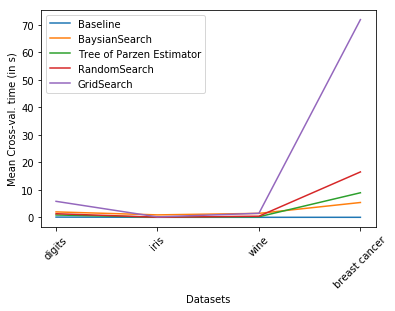

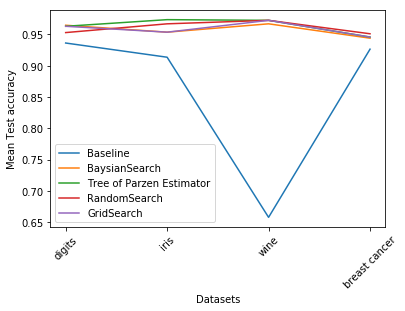

In [182]:
# Plot cross validation -e.g. tuning time
plot_by_ds(MEAN+CV_TIME, all_results, ds_names)
# Plot Test Accuracy
plot_by_ds(MEAN+TEST_ACC, all_results, ds_names)